In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bank-full.csv",sep=";")
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='duration'>

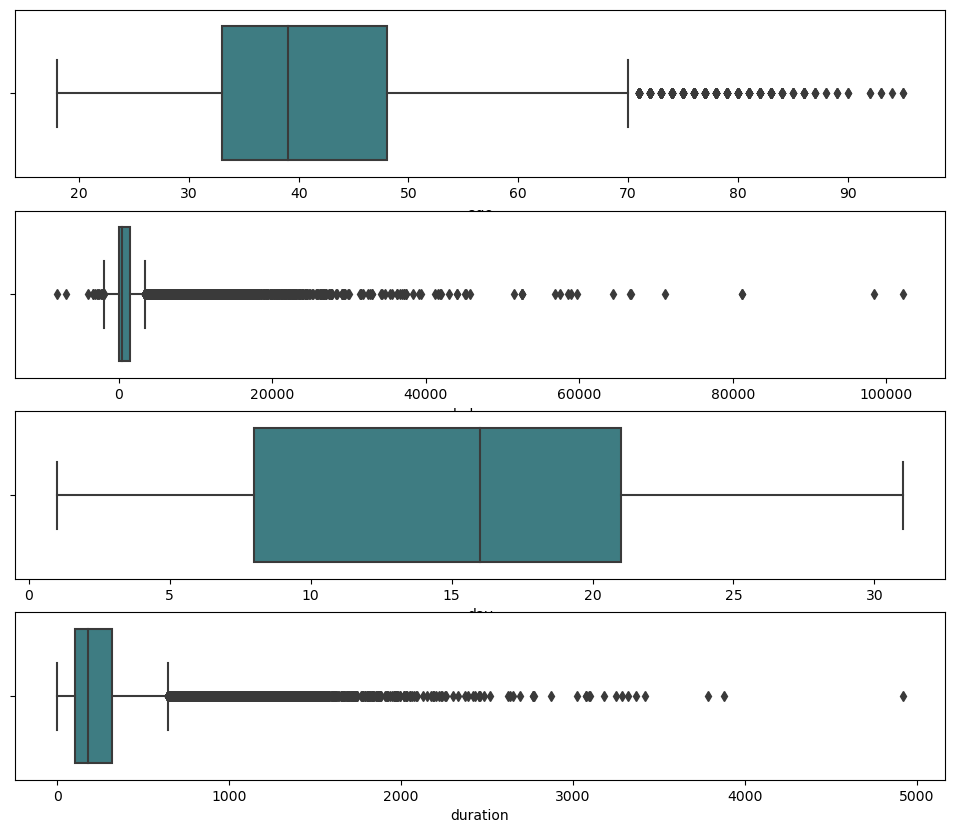

In [4]:
#EDA
bp=df.copy()
fig, axes=plt.subplots(4,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='age',data=bp,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=bp,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=bp,palette='crest',ax=axes[2])
sns.boxplot(x="duration",data=bp,palette='crest',ax=axes[3])


In [5]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = ["age", "balance","duration","campaign","pdays","previous" ]
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df = data_without_outliers

       age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45198   37    management  married   tertiary      no     1428      no   no   
45202   34        admin.   single  secondary      no      557      no   no   
45203   23       student   single   tertiary      no      113      no   no   
45205   25    technician   single  secondary      no      505      no  yes   
45209   57   blue-collar  married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previou

TypeError: could not convert string to float: 'management'

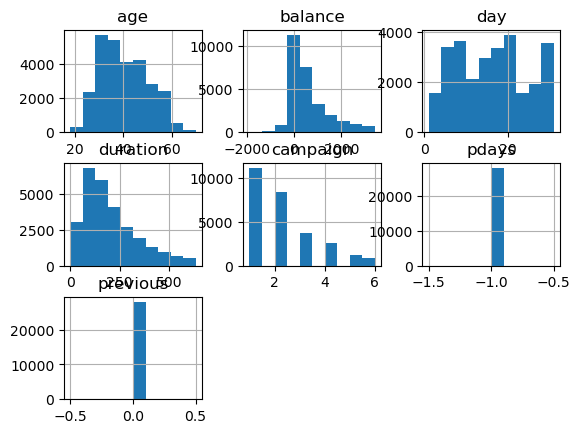

In [6]:

#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()
df.skew()
df.kurt()
df.describe()

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["job"]=LE.fit_transform(df["job"])
df["marital"]=LE.fit_transform(df["marital"])
df["education"]=LE.fit_transform(df["education"])
df["default"]=LE.fit_transform(df["default"])
df["housing"]=LE.fit_transform(df["housing"])
df["loan"]=LE.fit_transform(df["loan"])
df["contact"]=LE.fit_transform(df["contact"])
df["month"]=LE.fit_transform(df["month"])
df["poutcome"]=LE.fit_transform(df["poutcome"])
df["y"]=LE.fit_transform(df["y"])
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
df["age"]=SC.fit_transform(df[["age"]])
df["balance"]=SC.fit_transform(df[["balance"]])
df["day"]=SC.fit_transform(df[["day"]])
df["duration"]=SC.fit_transform(df[["duration"]])
df["campaign"]=SC.fit_transform(df[["campaign"]])
df["pdays"]=SC.fit_transform(df[["pdays"]])
df["previous"]=SC.fit_transform(df[["previous"]])
df


In [ ]:
X=df.iloc[:,0:16]
Y=df["y"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

Y_pred_train=logreg.predict(X_train)
Y_pred_test=logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Training Accuracy",accuracy_score(Y_train,Y_pred_train))
print("Testing Accuracy",accuracy_score(Y_test,Y_pred_test))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix
print("Training confusion matrix",cm(Y_train,Y_pred_train))
print("Testing confusion matrix",cm(Y_test,Y_pred_test))

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("Training Sensitivity score:", recall_score(Y_train,Y_pred_train).round(3))
print("Testing Sensitivity score:", recall_score(Y_test,Y_pred_test).round(3))

print("Training Precision score:", precision_score(Y_train,Y_pred_train).round(3))
print("Testing Precision score:", precision_score(Y_test,Y_pred_test).round(3))

print("Training F1 score:", f1_score(Y_train,Y_pred_train).round(3))
print("Testing F1 score:", f1_score(Y_test,Y_pred_test).round(3))

In [ ]:
# validation set method --> validaton hold-off method

training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    logreg.fit(X_train,Y_train) # Bo + b1x1 + B2x2
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


In [ ]:
# k-fold cross validation method

from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)

training_accuracy= []
test_accuracy = []

for train_index,test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train,Y_train)
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))



import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


In [ ]:
Y_probabilties = logreg.predict_proba(X)[:,1]
Y_probabilties

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(Y,Y_probabilties)

import matplotlib.pyplot as plt
plt.scatter(x = fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()


In [ ]:
#Inference:
#The logistic regression model achieved high accuracy on both the training and testing datasets,
#with a training accuracy of approximately 94.31% and a testing accuracy of around 94.43%.
#This suggests that the model generalizes well to unseen data, indicating robust performance.